In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
! pip install seaborn

# Load Data

In [86]:
source = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

In [87]:
data = pd.read_csv(
    source,
    names=column_names, na_values='?',
    sep=' ', skipinitialspace=True,
    comment='\t'
    )

In [88]:
dataCopy = data.copy()

In [89]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


# Pre-Process Data

In [91]:
data.dropna(axis=0, inplace=True)

In [92]:
data.Origin.value_counts()

1    245
3     79
2     68
Name: Origin, dtype: int64

In [94]:
data.Origin.map({1:"USA", 2:"EUROPE", 3:"JAPAN"})

AttributeError: 'DataFrame' object has no attribute 'Origin'

In [93]:
data = pd.get_dummies(data, columns=['Origin'])
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


# Exploratory Data Analysis

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin_1,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0
Origin_2,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Origin_3,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0


<Figure size 1440x720 with 0 Axes>

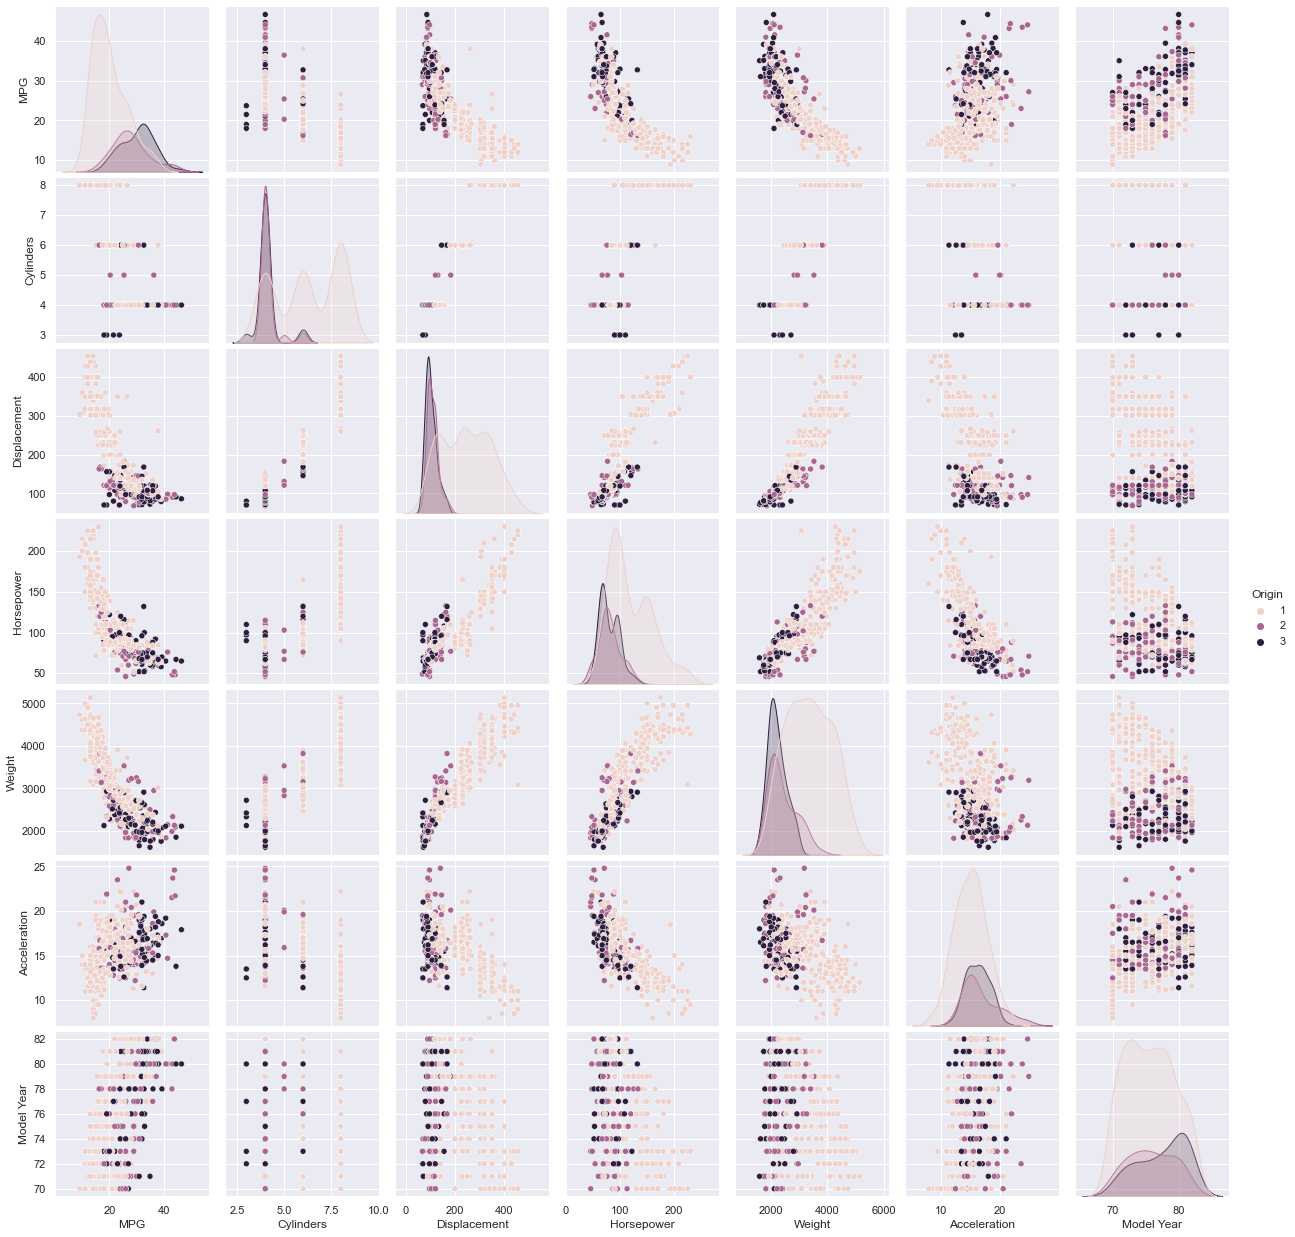

In [95]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20, 10))
sns.pairplot(dataCopy, hue='Origin')

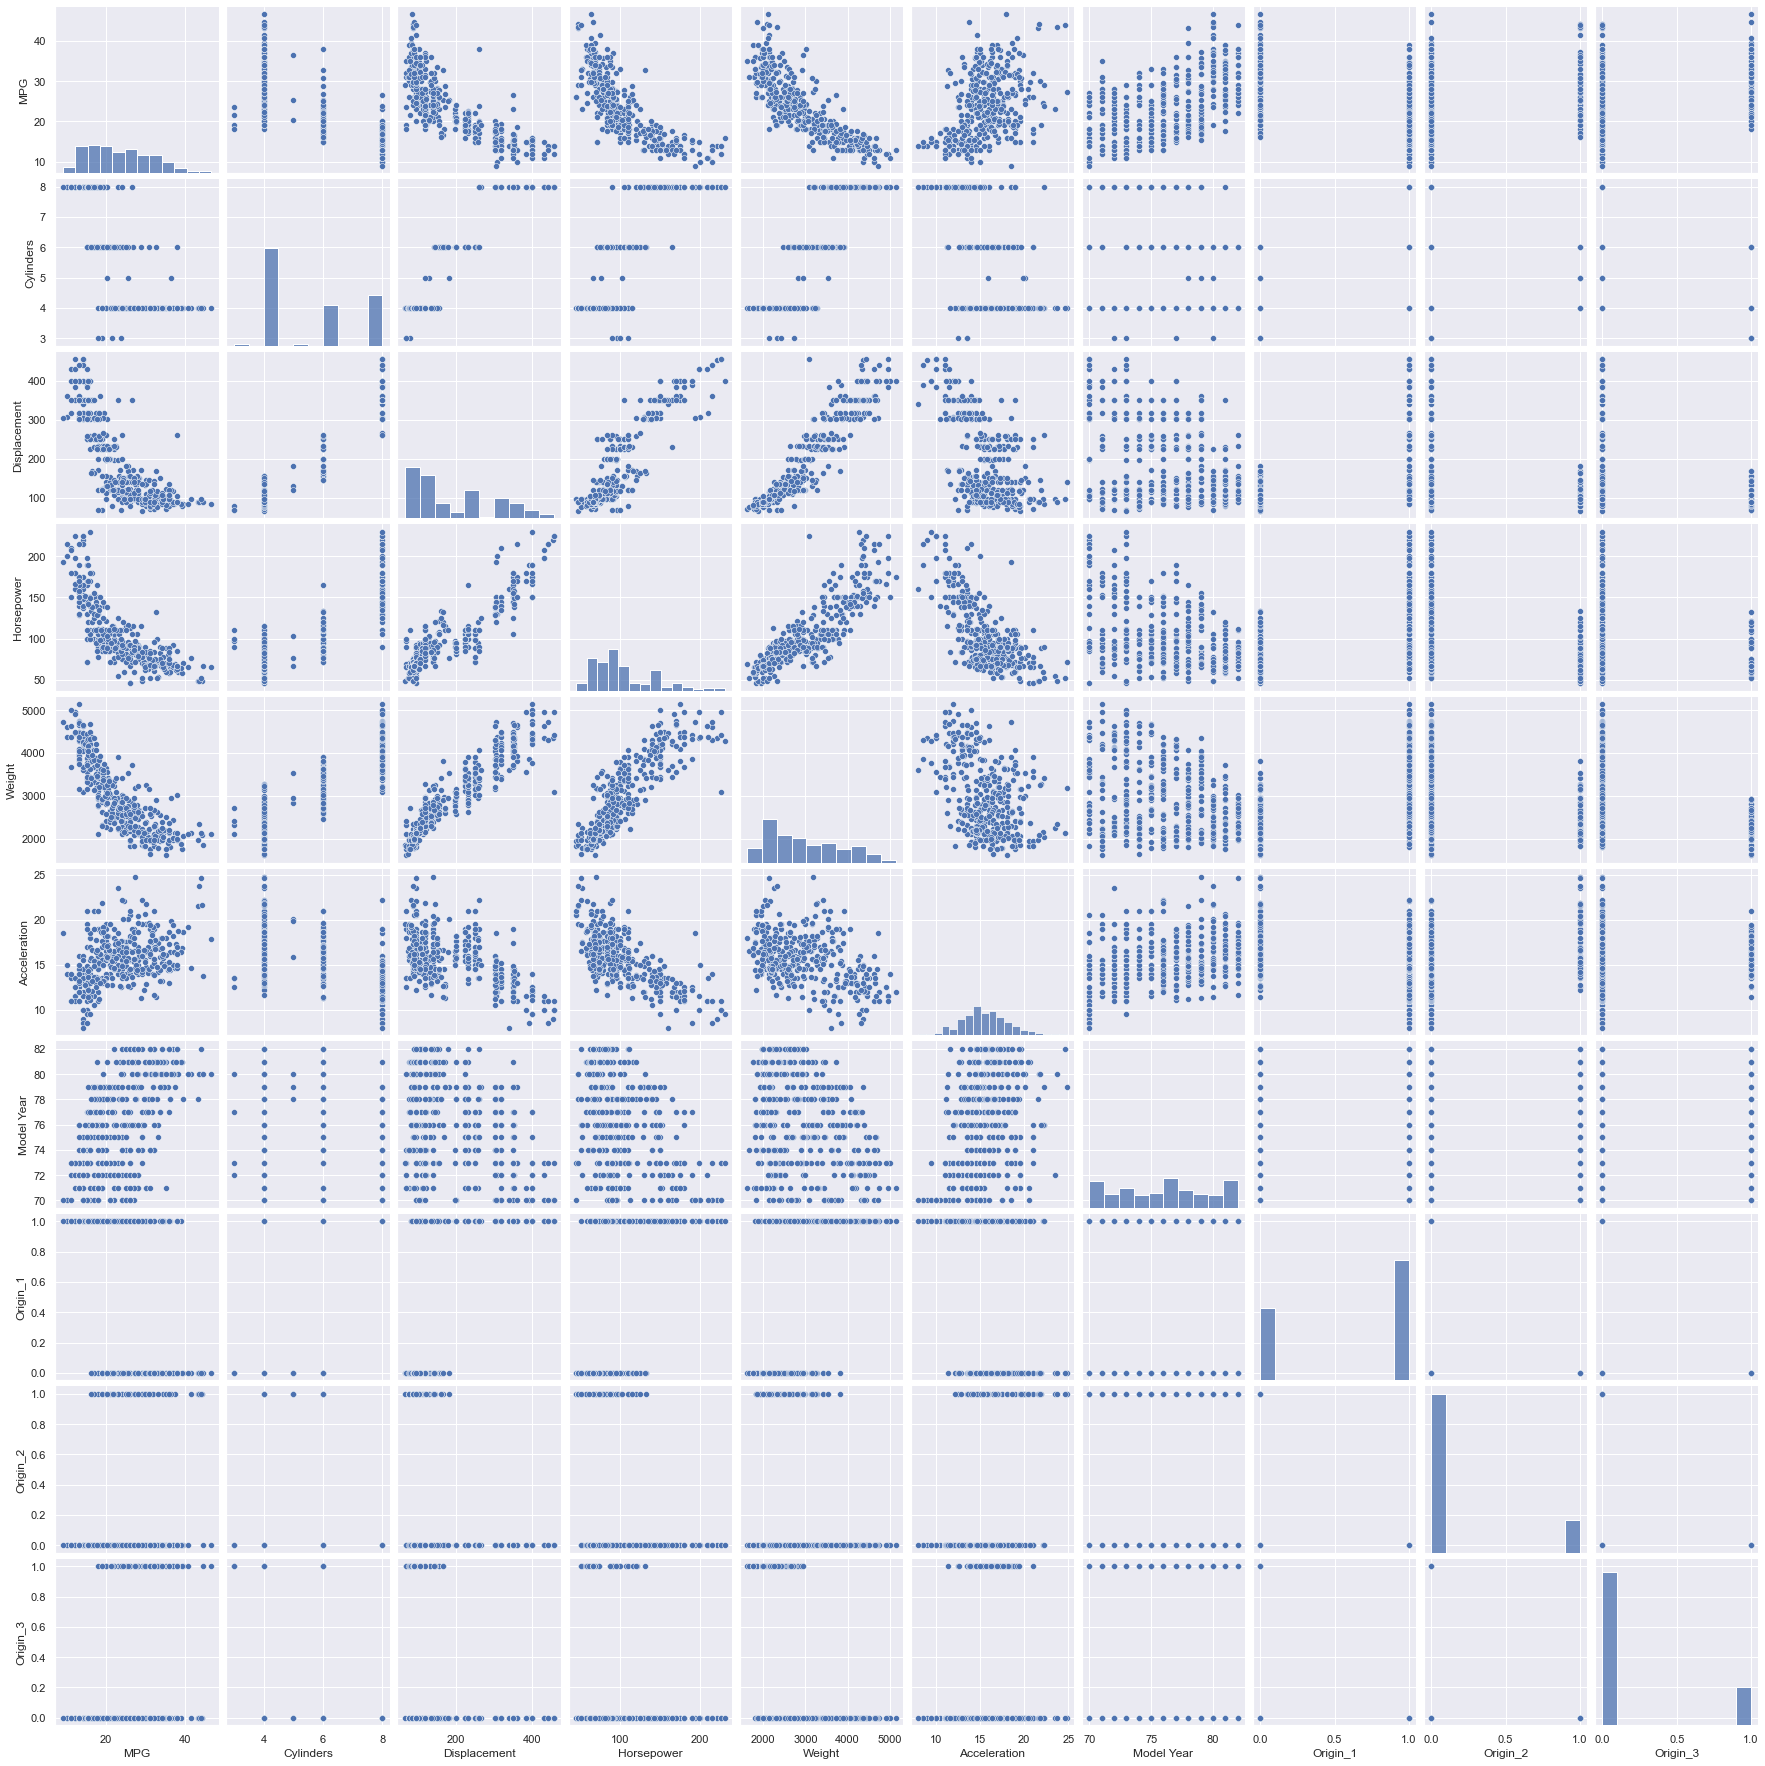

In [83]:
sns.pairplot(data, palette='Set2')

<AxesSubplot:>

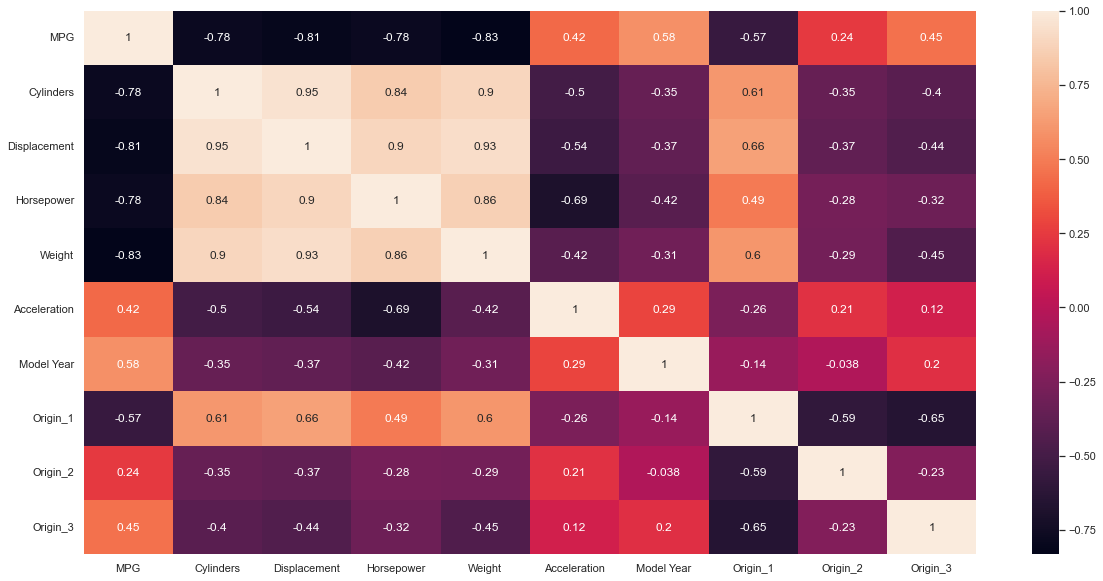

In [96]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='Horsepower'>

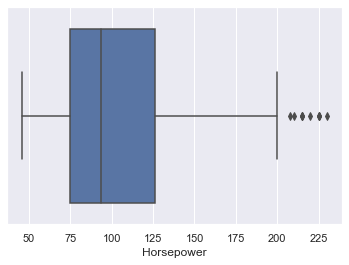

In [97]:
sns.boxplot(x=data.Horsepower)

In [ ]:
q1 = np.percentile(data.Horsepower, 25)#q1 = np.percentile(data.Horsepower, 25, method="midpoint")
q3 = np.percentile(data.Horsepower, 75)#q3 = np.percentile(data.Horsepower, 75, method="midpoint")
iqr = q3 - q1
iqr

In [ ]:
outliers_index_lower = np.where(data.Horsepower < q1 - (1.5 * iqr))
outliers_index_lower

In [ ]:
outliers_index_upper = np.where(data.Horsepower > q3 + (1.5 * iqr))
outliers_index_upper[0]

In [ ]:
data.drop(outliers_index_upper[0], inplace=True)

In [98]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


# Train Test Set

In [99]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    data[['Horsepower']], data[['MPG']], test_size=0.2, random_state=42
)

# Neural Network Modeling

In [ ]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=-1)
normalizer.adapt(xtrain)

## Single Neuron

In [ ]:
# Defining The Structure
model_single_neuron = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [ ]:
# Defining Optimization
model_single_neuron.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse', 'mae']
)

In [ ]:
model_single_neuron.fit(
    x=xtrain, y=ytrain,
    epochs=20, verbose=2,
    validation_split=0.2
)

In [ ]:
model_single_neuron.summary()

In [ ]:
history = pd.DataFrame(model_single_neuron.history.history)
history

In [ ]:
history.index.values

In [ ]:
history['mse']

In [ ]:
def plotNN(model):
    history = pd.DataFrame(model.history.history)
    plt.figure(figsize=(18, 10))
    plt.plot(history.index.values, history['loss'], label='Training Error', color='darkorange', linewidth=3)
    plt.plot(history.index.values, history['val_loss'], label='Validation Error', color='lightgreen', linewidth=3)
    plt.legend()
    plt.show()

In [ ]:
plotNN(model_single_neuron)

## Shallow Neural Network

In [ ]:
# Defining The Structure
shallowNN = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [ ]:
# Defining Optimization
shallowNN .compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse']
)

In [ ]:
shallowNN .fit(
    x=xtrain, y=ytrain,
    epochs=100, verbose=2,
    validation_split=0.2
)

In [ ]:
shallowNN.summary()

In [ ]:
plotNN(shallowNN)

## Deep Neural Network

In [ ]:
# Defining The Structure
deepNN = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=28, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [ ]:
# Defining Optimization
deepNN .compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse']
)

In [ ]:
deepNN .fit(
    x=xtrain, y=ytrain,
    epochs=100, verbose=2,
    validation_split=0.2
)

In [ ]:
deepNN.summary()

In [ ]:
plotNN(deepNN)

# Testing and Evaluation

In [ ]:
model_single_neuron.evaluate(xtest, ytest)

In [ ]:
shallowNN.evaluate(xtest, ytest)

In [ ]:
deepNN.evaluate(xtest, ytest)

## Complex Model

In [ ]:
data.shape

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    data.drop(columns=['MPG']), data[['MPG']], test_size=0.3, random_state=42
)

In [ ]:
complex_normalizer = tf.keras.layers.Normalization(input_shape=[9,], axis=-1)
complex_normalizer.adapt(Xtrain)

In [ ]:
complex_NN = tf.keras.Sequential([
    complex_normalizer,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
])

In [ ]:
complex_NN.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [ ]:
complex_NN.fit(
    Xtrain, Ytrain,
    validation_split=0.2,
    verbose=2, epochs=100
)

In [ ]:
complex_NN.summary()

In [ ]:
plotNN(complex_NN)

In [ ]:
complex_NN.evaluate(Xtest, Ytest)

In [ ]:
complex_NN.predict(Xtest)

In [ ]:
Ytest

## Saving Model

In [ ]:
complex_NN.save('complex_nn')

## Load Model

In [100]:
model = tf.keras.models.load_model('complex_nn')

In [101]:
model.predict(Xtest)

array([[17.029524 ],
       [16.695652 ],
       [15.384704 ],
       [20.206528 ],
       [15.52188  ],
       [20.09985  ],
       [15.299408 ],
       [15.178075 ],
       [19.170717 ],
       [16.875963 ],
       [38.555958 ],
       [22.6613   ],
       [25.377708 ],
       [18.733631 ],
       [14.6721735],
       [15.885016 ],
       [14.89515  ],
       [28.350933 ],
       [36.14694  ],
       [17.466139 ],
       [19.547146 ],
       [20.497509 ],
       [16.097713 ],
       [17.279041 ],
       [31.072678 ],
       [15.0422735],
       [16.414158 ],
       [36.965965 ],
       [14.97578  ],
       [17.931969 ],
       [23.123753 ],
       [21.154293 ],
       [33.24064  ],
       [14.620719 ],
       [21.606283 ],
       [39.461178 ],
       [17.277508 ],
       [28.889    ],
       [31.28524  ],
       [18.47254  ],
       [16.03862  ],
       [14.289489 ],
       [15.470563 ],
       [22.913645 ],
       [31.800741 ],
       [14.734362 ],
       [14.90469  ],
       [14.64